#<center>**Mini-Projeto: Sistema de Compartilhamento e Aluguel de Bicicletas**
#<center>**Aluna: Rayanne Kelly Marcelino Barros Elias**
#<center>**Disciplina: Mineração de Dados**

# **Bibliotecas:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# **Base de dados:**

In [ ]:
bike_hour = pd.read_csv('/content/hour.csv')
bike_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Informações sobre a base de dados:**

**- datetime:** data por hora + timestamp

**- season:**
> 1 = primavera

> 2 = verão

> 3 = outono

> 4 = inverno

**- holiday:** se o dia é considerado feriado

**- workingday:** se o dia não é fim de semana nem feriado

**- wheater:**

> 1 = céu limpo, poucas nuvens ou parcialmente nublado

> 2 = Névoa + Nublado, Névoa + Nuvens quebradas, Névoa + Algumas nuvens, Névoa

> 3 = neve fraca, chuva fraca + trovoada + nuvens dispersas, chuva fraca + nuvens dispersas

> 4 = Chuva forte + Paletes de gelo + Trovoada + Névoa, Neve + Nevoeiro


**- temp:** temperatura em Celsius

**- atemp:** sensação térmica em Celsius

**- humidity:** umidade relativa do ar

**- windspeed:** velocidade do vento

**- casual:** número de aluguéis de usuários não registrados no sistema

**- registered:** - número de aluguéis de usuários registrados no sistema

**- cnt:** número total de locações (nossa previsão)

# **Análise exploratória da base de dados:**

In [ ]:
#Informações estatísticas
bike_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
#Quantidade de linhas e colunas
bike_hour.shape

(17379, 17)

In [ ]:
#Contagem de dados não-nulos
bike_hour.count()

instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
dtype: int64

In [ ]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


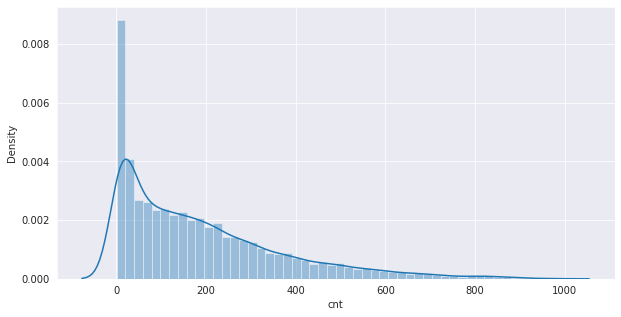

In [ ]:
#Distribuição do atributo cnt
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.distplot(bike_hour.cnt)

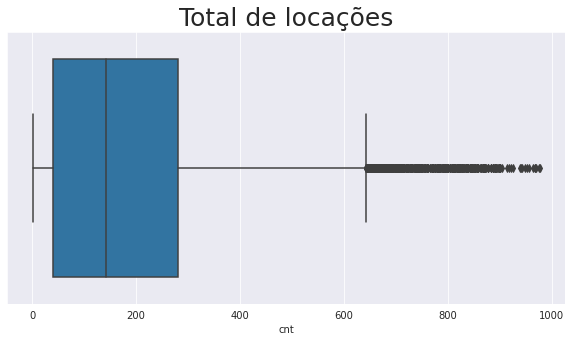

In [ ]:
ax = sns.boxplot(x=bike_hour['cnt'])
ax.figure.set_size_inches(10, 5)
ax.set_title('Total de locações', fontsize=25)
ax

In [ ]:
#Grau de correlação das variáveis com a variável que queremos prever(cnt)
correlations = bike_hour.corr()
correlations['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

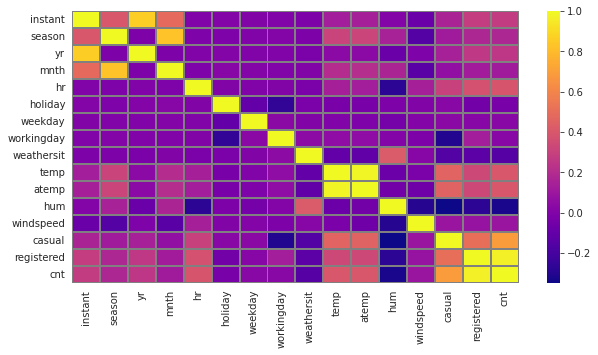

In [ ]:
#Gráfico correlação entre variáveis
plt.subplots(figsize=(10, 5))
sns.heatmap(correlations, cmap='plasma', linecolor='gray', linewidths=1)

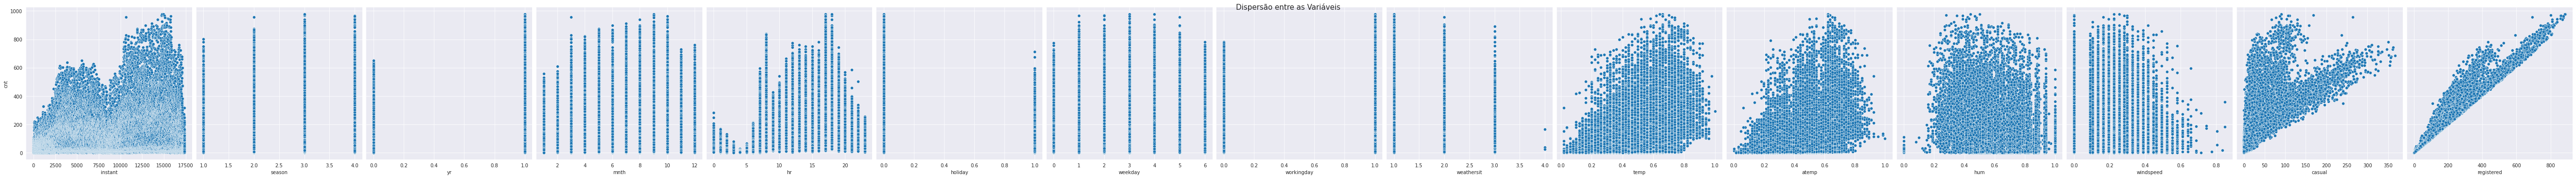

In [ ]:
#Gráfico de dispersão entre as Variáveis e a variável que queremos prever (cnt)
ax = sns.pairplot(bike_hour, y_vars='cnt', x_vars=['instant','season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','casual','registered'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=15, y=1)
ax

**Relação entre temperatura (temp) e número total de locações (cnt)**

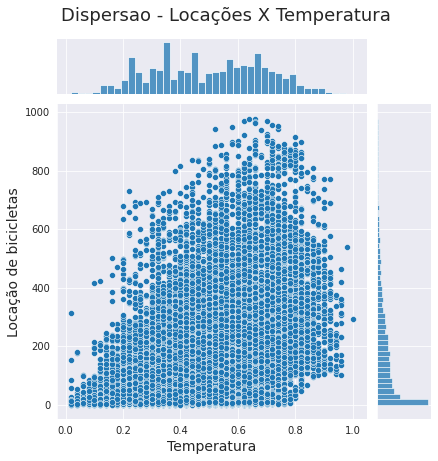

In [ ]:
ax = sns.jointplot(x= "temp", y="cnt", data= bike_hour)
ax.fig.suptitle('Dispersao - Locações X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura", "Locação de bicicletas", fontsize=14)
ax

**Relação entre número total de locações (cnt) e estação do ano (season)**

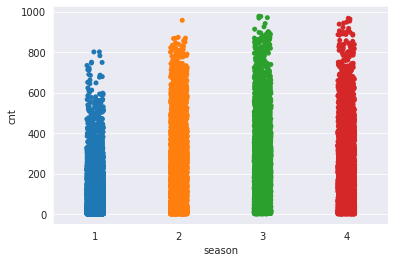

In [ ]:
sns.stripplot(x='season', y ='cnt', data=bike_hour)

Lembrando que:

1 = primavera

2 = verão

3 = outono

4 = inverno

**Relação entre número total de locações (cnt) e clima (weathersit)**

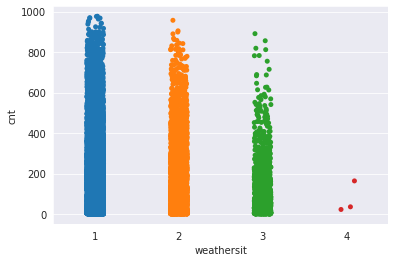

In [ ]:
sns.stripplot(x='weathersit', y ='cnt', data=bike_hour)

Lembrando que:

1 = céu limpo, poucas nuvens ou parcialmente nublado

2 = Névoa + Nublado, Névoa + Nuvens quebradas, Névoa + Algumas nuvens, Névoa

3 = neve fraca, chuva fraca + trovoada + nuvens dispersas, chuva fraca + nuvens dispersas

4 = Chuva forte + Paletes de gelo + Trovoada + Névoa, Neve + Nevoeiro


**Relação entre sensação térmica (atemp) e número total de locações (cnt)**

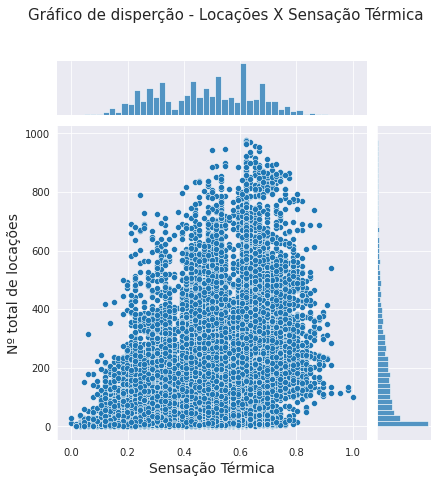

In [ ]:
ax = sns.jointplot(x="atemp", y="cnt", data=bike_hour)
ax.fig.suptitle('Gráfico de disperção - Locações X Sensação Térmica', fontsize=15, y=1.1)
ax.set_axis_labels("Sensação Térmica", "Nº total de locações", fontsize=14)
ax

**Relação velocidade do vento (windspeed) e número total de locações (cnt)**

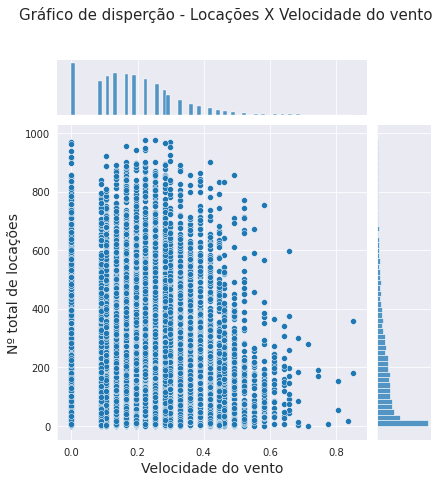

In [ ]:
ax = sns.jointplot(x="windspeed", y="cnt", data=bike_hour)
ax.fig.suptitle('Gráfico de disperção - Locações X Velocidade do vento', fontsize=15, y=1.1)
ax.set_axis_labels("Velocidade do vento", "Nº total de locações", fontsize=14)
ax

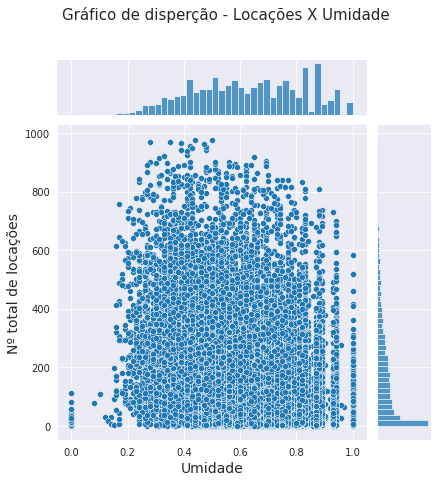

In [ ]:
ax = sns.jointplot(x="hum", y="cnt", data=bike_hour)
ax.fig.suptitle('Gráfico de disperção - Locações X Umidade', fontsize=15, y=1.1)
ax.set_axis_labels("Umidade", "Nº total de locações", fontsize=14)
ax

# **Etapa de pré-processamento:**

In [ ]:
# Dados categóricos também podem vim com formato inteiro, com valores discretos. 
# Para isso, o número 1 simboliza uma determinada classe, assim como o número 2, etc…
features_categoricas = ['season', 'weathersit', 'mnth', 'hr', 'weekday']

In [ ]:
bike_hour.season.unique()

array([1, 2, 3, 4])

<BarContainer object of 4 artists>

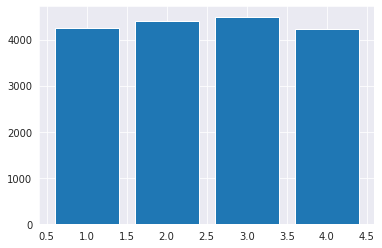

In [ ]:
plt.bar(bike_hour.season.value_counts().index, bike_hour.season.value_counts().values)

In [ ]:
bike_hour.weathersit.unique()

array([1, 2, 3, 4])

<BarContainer object of 4 artists>

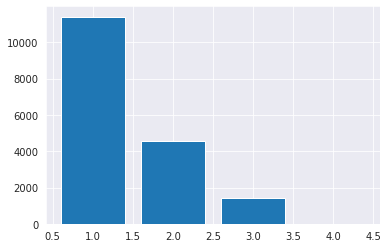

In [ ]:
plt.bar(bike_hour.weathersit.value_counts().index, bike_hour.weathersit.value_counts().values)

In [ ]:
bike_hour.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

<BarContainer object of 12 artists>

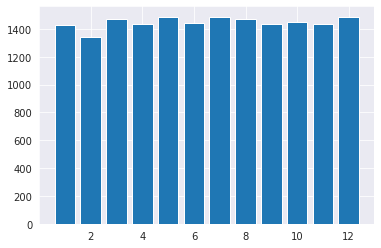

In [ ]:
plt.bar(bike_hour.mnth.value_counts().index, bike_hour.mnth.value_counts().values)

In [ ]:
bike_hour.hr.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

<BarContainer object of 24 artists>

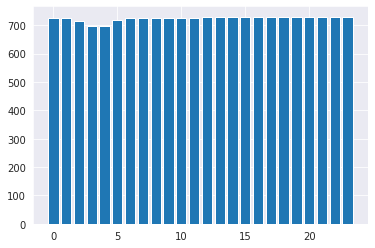

In [ ]:
plt.bar(bike_hour.hr.value_counts().index, bike_hour.hr.value_counts().values)

In [ ]:
bike_hour.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5])

<BarContainer object of 7 artists>

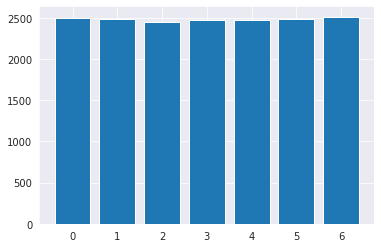

In [ ]:
plt.bar(bike_hour.weekday.value_counts().index, bike_hour.weekday.value_counts().values)

In [ ]:
#Tranformando as features categoricas ('season', 'weathersit', 'mnth', 'hr', 'weekday') em features binarias
for i in features_categoricas:
    categoricas = pd.get_dummies(bike_hour[i], prefix=i, drop_first=False)
    bike_hour = pd.concat([bike_hour, categoricas], axis=1)

In [ ]:
#Removendo as features 'instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr', 'casual', 'registered'
new = bike_hour.drop(['instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr', 'casual', 'registered'], axis=1)
new.head()

,yr,holiday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,16,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,40,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,32,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,13,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Realizando a normalização / padronização dos dados continuos
# Evitar enviesamento para as variáveis com maior ordem de grandeza.
for i in ['cnt', 'temp', 'hum', 'windspeed']:
    mean, std = new[i].mean(), new[i].std()
    new.loc[:, i] = (new[i] - mean)/std

# **Utilizando Machine Learning:**

In [ ]:
#Separando os dados de treino e teste:
dropcnt = new.drop(['cnt'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(dropcnt, new['cnt'], test_size=0.20, random_state=42)

###**Testando por regressão linear:**

Regressão linear é o processo de traçar uma reta através dos dados em um diagrama de dispersão. A reta resume esses dados, o que é útil para realizar a previsão. 

In [ ]:
#Instanciando o algoritmo:
lr = LinearRegression()

In [ ]:
#Treinando o algoritmo e gerando o modelo de regressão
model = lr.fit(x_train,y_train)

In [ ]:
#Realizando a predição
resultado = model.predict(x_test)

In [ ]:
#Calculando o erro médio quadrático:
erromedio1 = mean_squared_error(y_test, resultado)
erromedio1

0.3069885867381137

In [ ]:
#Comparando os resultados aplicando os dados de treinamento:
resultado_treino = model.predict(x_train)
mean_squared_error(y_train, resultado_treino)

0.3160131598142004

###**Testando Árvore de Decisão:**

Nesse modelo, vários pontos de decisão serão criados. Estes pontos são os “nós” da árvore e em cada um deles o resultado da decisão será seguir por um caminho, ou por outro. Os caminhos existentes são os “ramos”. É comum definirmos um número mínimo de amostras para cada novo nó, ou ainda um número máximo de nós para cada ramo. Assim, mesmo que as amostras de um ramo sejam suficientes para criação de um novo nó, caso o número de amostras seja inferior ao que definimos, ou o número máximo de nós do ramo já tenha sido atingido, o nó não será criado, de modo que todas as amostras que estão neste ramo receberão o mesmo resultado. Com isso talvez nossos erros aumentem, porém ao apresentar novos dados ao modelo, a probabilidade de uma previsão correta poderá ser maior.



In [ ]:
#Instanciando o algoritmo:
tree = DecisionTreeRegressor()

In [ ]:
#Treinando o algoritmo e gerando o modelo:
model_tree = tree.fit(x_train,y_train)
resultado_tree = tree.predict(x_test)

In [ ]:
#Calculando o erro médio quadrático:
erromedio2 = mean_squared_error(y_test, resultado_tree)
erromedio2

0.152490912757982

###**Utilizando o Random Forest:**

Apesar dos bons resultados que tivemos com a árvore de decisão ela pode estar sofrendo overfitting (sobreajuste) Assim, o Random forest tem a missão de resolver esse tipo de problema e por isso espera-se resultados ainda mais satisfatórios.
Ele usa várias árvores de decisão e pega o valor que cada uma das árvores, o resultado final vai ser o valor médio dessas árvores.

In [ ]:
#Instanciando o algoritmo:
tree_rf = RandomForestRegressor()

In [ ]:
#Treinando o algoritmo e gerando o modelo:
model_rf = tree_rf.fit(x_train, y_train)
resultado_rf = model_rf.predict(x_test)

In [ ]:
#Calculando o erro médio quadrático:
erromedio3 = mean_squared_error(y_test, resultado_rf)
erromedio3

0.08006084717011112

###**Ajustando os hiperparametros do Random Forest:**

Todos os modelos testados até o momento foram instanciados sem nenhum ajuste de parâmetro. Dessa forma, agora tentaremos encontrar os melhores parâmetros

In [ ]:
#Especificando os parâmetros de tunning:
parametros = {'min_samples_leaf':[1,10],'min_samples_split':[2,10],'n_estimators':[100,250,500,750]}


*   min_samples_leaf é o número mínimo de amostras necessárias para estar em um nó folha.
*   min_samples_split é o número mínimo de amostras necessárias para dividir um nó interno.
*  n_estimators é o número de árvores que será gerada.

In [ ]:
#Instanciando o RandomForest e GridSearch:
rf = RandomForestRegressor()
grid = GridSearchCV(rf, parametros)

In [ ]:
#Executando o grid:
grid.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
#Verificando os melhores parâmetros:
grid.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

In [ ]:
#Recuperando o melhor estimator:
rf_best = grid.best_estimator_

In [ ]:
resultado_final = rf_best.predict(x_test)

In [ ]:
#Calculando o erro médio quadrático:
erromedio4 = mean_squared_error(y_test, resultado_final)
erromedio4

0.07868750116503462

###**Análise dos modelos apresentados:**

In [ ]:
teste_1 = pd.Series({'Modelo': 'Regressão Linear', 'MSE': erromedio1})
teste_2 = pd.Series({'Modelo': 'Árvore de decisão', 'MSE': erromedio2})
teste_3 = pd.Series({'Modelo': 'Random Forest', 'MSE': erromedio3})
teste_4 = pd.Series({'Modelo': 'Hiperparametros RF', 'MSE':erromedio4})

df = pd.DataFrame([teste_1, teste_2, teste_3, teste_4])
df

,Modelo,MSE
0,Regressão Linear,0.306989
1,Árvore de decisão,0.152491
2,Random Forest,0.080061
3,Hiperparametros RF,0.078688


Utilizamos o seguinte parâmetro para análise do funcionamento dos modelos:


*   **O mean_squared_error:** a diferença média quadrática entre o valor predito e o valor real, quanto menor for esse valor mais próximo o modelo está de acertar.
$$MSE = 1/n {\sum_{i=1}^{n}} (\hat{y}_i-y_i)^2$$

Podemos concluir que o modelo de regressão linear e árvore de decisão possui resultados um pouco inferiores, uma vez que possuem maior mean_squared_error, se comparado aos outros dois modelos. Sabendo que temos muitos dados binários no conjunto de dados (0 e 1) e os modelos de regressão linear tendem a funcionar melhor quando temos dados numéricos contínuos. Já a árvore de decisão, como já foi abordado anteriormente pode sofrer de overfitting, isto é,  aprendeu muitos detalhes dos dados que foram utilizados para treinar o modelo. Na prática, o modelo acabou decorando as condições, de maneira que ao receber novos dados, que costumam possuir relacionamentos similares mas não iguais, estas pequenas diferenças farão o modelo não encontrar as condições exatas que ele decorou, e, por consequência, sua previsão estará errada.
O random forest apresenta resultados satisfatórios e após o ajuste de parâmetros obtemos uma evolução nos resultados.



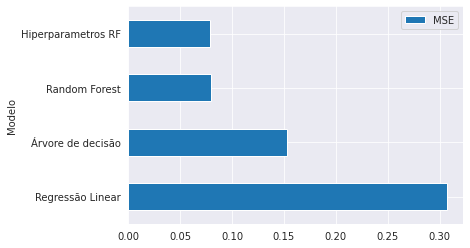

In [ ]:
df.plot(x ='Modelo', y='MSE', kind = 'barh')

# **Utilizando rede neural:**

Será utilizado o Perceptron Multicamadas (PMC ou MLP — Multi Layer Perceptron) que é uma rede neural com uma ou mais camadas ocultas com um número indeterminado de neurônios.O MLP pode relacionar o conhecimento a vários neurônios de saída.

#### Teste 1 - Utilizando parâmetros padrão:

In [ ]:
#Instanciando o algoritmo:
mlp = MLPRegressor()

NameError: ignored

In [ ]:
#Treinando o algoritmo e gerando o modelo de regressão
mlp.fit(x_train, y_train)

In [ ]:
#Realizando a predição
resultado_mlp = mlp.predict(x_test)

In [ ]:
#Calculando o erro médio quadrático:
erromedio5 = mean_squared_error(y_test, resultado_mlp)
erromedio5

#### Teste 2 - Aumentando o número de neurônios na i-ésima camada oculta:

In [ ]:
mlp2 = MLPRegressor(hidden_layer_sizes=(1000,))

In [ ]:
#Treinando o algoritmo e gerando o modelo de regressão
mlp2.fit(x_train, y_train)

In [ ]:
#Realizando a predição
resultado_mlp2 = mlp2.predict(x_test)

In [ ]:
#Calculando o erro médio quadrático:
erromedio6 = mean_squared_error(y_test, resultado_mlp2)
erromedio6

#### Teste 3 - Diminuindo o número de neurônios na i-ésima camada oculta:

In [ ]:
mlp3 = MLPRegressor(hidden_layer_sizes=(10,))

In [ ]:
#Treinando o algoritmo e gerando o modelo de regressão
mlp3.fit(x_train, y_train)

In [ ]:
#Realizando a predição
resultado_mlp3 = mlp3.predict(x_test)

In [ ]:
#Calculando o erro médio quadrático:
erromedio7 = mean_squared_error(y_test, resultado_mlp3)
erromedio7

####Analisando as alterações no número de neurônios na i-ésima camada oculta:

In [ ]:
teste_1 = pd.Series({'hidden_layer_sizes': '100', 'MSE': erromedio5})
teste_2 = pd.Series({'hidden_layer_sizes': '1000', 'MSE': erromedio6})
teste_3 = pd.Series({'hidden_layer_sizes': '10', 'MSE': erromedio7})


df = pd.DataFrame([teste_3, teste_1, teste_2])
df

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(data = df, x ='hidden_layer_sizes', y='MSE')

#### Teste 4 - Aumentando a taxa de aprendizagem inicial usada (responsável por controlar o tamanho do passo na atualização dos pesos):

In [ ]:
mlp4 = MLPRegressor(learning_rate_init=0.01)

In [ ]:
#Treinando o algoritmo e gerando o modelo de regressão
mlp4.fit(x_train, y_train)

In [ ]:
#Realizando a predição
resultado_mlp4 = mlp4.predict(x_test)

In [ ]:
#Calculando o erro médio quadrático:
erromedio8 = mean_squared_error(y_test, resultado_mlp4)
erromedio8

#### Teste 5 - Diminuindo a taxa de aprendizagem inicial usada (responsável por controlar o tamanho do passo na atualização dos pesos):

In [ ]:
mlp5 = MLPRegressor(learning_rate_init=0.00001)

In [ ]:
#Treinando o algoritmo e gerando o modelo de regressão
mlp5.fit(x_train, y_train)

In [ ]:
#Realizando a predição
resultado_mlp5 = mlp5.predict(x_test)

In [ ]:
#Calculando o erro médio quadrático:
erromedio9 = mean_squared_error(y_test, resultado_mlp5)
erromedio9

#### Analisando as alterações na taxa de aprendizagem inicial usada:

In [ ]:
teste_1 = pd.Series({'learning_rate_init': '0.001', 'MSE': erromedio5})
teste_2 = pd.Series({'learning_rate_init': '0.01', 'MSE': erromedio8})
teste_3 = pd.Series({'learning_rate_init': '0.00001', 'MSE': erromedio9})


df = pd.DataFrame([teste_3, teste_1, teste_2])
df

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(data = df, x = 'learning_rate_init', y='MSE')

#### Teste 6 - Aumentando o número de iterações:

In [ ]:
mlp6 = MLPRegressor(max_iter=1000)

In [ ]:
#Treinando o algoritmo e gerando o modelo de regressão
mlp6.fit(x_train, y_train)

In [ ]:
#Realizando a predição
resultado_mlp6 = mlp6.predict(x_test)

In [ ]:
#Calculando o erro médio quadrático:
erromedio10 = mean_squared_error(y_test, resultado_mlp6)
erromedio10

#### Teste 7 - Diminuindo o número de iterações:

In [ ]:
mlp7 = MLPRegressor(max_iter=50)

In [ ]:
#Treinando o algoritmo e gerando o modelo de regressão
mlp7.fit(x_train, y_train)

In [ ]:
#Realizando a predição
resultado_mlp7 = mlp7.predict(x_test)

In [ ]:
#Calculando o erro médio quadrático:
erromedio11 = mean_squared_error(y_test, resultado_mlp7)
erromedio11

#### Analisando as alterações no número de iterações:

In [ ]:
teste_1 = pd.Series({'max_iter': '200', 'MSE': erromedio5})
teste_2 = pd.Series({'max_iter': '1000', 'MSE': erromedio10})
teste_3 = pd.Series({'max_iter': '50', 'MSE': erromedio11})


df = pd.DataFrame([teste_3, teste_1, teste_2])
df

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(data = df, x ='max_iter', y='MSE')

##Vale ressaltar, que não foi realizada uma quantidade suficiente de teste para uma melhor conclusão do comportamento desses parâmetros, para gerar assim uma análise mais aprofundada.

# **Conclusão:**

In [ ]:
teste_1 = pd.Series({'Modelo': 'Regressão Linear', 'MSE': erromedio1})
teste_2 = pd.Series({'Modelo': 'Árvore de decisão', 'MSE': erromedio2})
teste_3 = pd.Series({'Modelo': 'Random Forest', 'MSE': erromedio3})
teste_4 = pd.Series({'Modelo': 'Hiperparametros RF', 'MSE':erromedio4})
teste_5 = pd.Series({'Modelo': 'MLP', 'MSE':erromedio5})

df2 = pd.DataFrame([teste_1, teste_2, teste_3, teste_4, teste_5])
df2

,Modelo,MSE
0,Regressão Linear,0.306989
1,Árvore de decisão,0.152491
2,Random Forest,0.080061
3,Hiperparametros RF,0.078688
4,MLP,0.049784


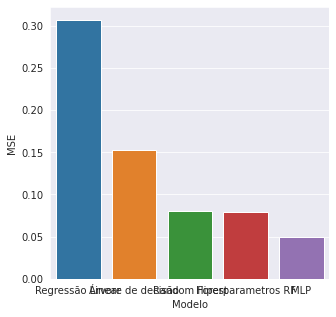

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(data = df2, x ='Modelo', y='MSE')

O presente projeto teve como objetivo combinar padrões históricos de uso com dados meteorológicos para prever a demanda de aluguel de bicicletas no programa na cidade de Washington. Para tal, foi utilizado o dataset de horas. Tratando-se de um dataset extenso e que possibilita as mais variadas formas de análise e extração, evidenciou-se a necessidade de analisar, testar e entender alguns comportamentos para assim realizar um tratamento de dados adequado que possibilitasse futuramente o treinamento e previsão dos dados. 

Ao realizar o treinamento, utilizando técnicas diferentes, foi possível observar que para o dataset analisado todos os modelos de modo geral obteram resultados satisfatórios, ainda que o Random Forest sem ajuste de parâmetro, o Random Forest com ajuste nos hiperparâmetros e a rede neural se destaquem com melhores resultados. Vale ressaltar, que a rede neural com várias camadas apresenta dentre os 3 modelos citados, a menor média de erro quadrática, ainda que não seja uma diferença discrepante. Entretanto, ao ajustar seus parâmetros obtém resultados que se iguala com outros modelos como o de regressão linear e a árvore de decisão, ambos que obtiveram as maiores médias de erro. 
